# PlaiCraft DSCI 100 Individual Planning

In this individual planning, I will analyze and visualize data provided by Frank Wood's Computer Science research group for their vanilla survival MineCraft server, PlaiCraft. The datasets provided were players.csv and sessions.csv.

### Data Description and Pre-Inspection

Before we start analyzing, here are a couple details about the collection of the data:
 - Collected between May 1 - September 1, 2024
 - Each sessions' data was collected from when game browser opened to closed

After previewing both datasets, there are two NA values and two rows missing data. However, the other variables of those rows may be valuable, so I won't drop them; just make note of them.

So, let's begin! First, let's load some R packages.

In [2]:
library(tidyverse)
library(ggplot2)
library(lubridate)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### 1. Inspecting the Datasets with R Functions and Summaries

Let's read in the datasets and inspect what's in store.

In [3]:
url_players <- "https://raw.githubusercontent.com/tchan0717/dsci-100-2025w1-group-36/refs/heads/main/data/players.csv"
players_data <- read_csv(url_players)
players_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


#### Description of the set:

The "players.csv" has 196 observations and 7 variables:
1. `experience`: *character* - the "level" of players' gaming experience from Beginner, Amateur, Regular, Veteran, or Pro (most experienced)
2. `subscribe`: *logical* - subscription to PlaiCraft's newsletter, indicated with TRUE for "yes" or FALSE for "no"
3. `hashedEmail`: *character* - player's hashed email
4. `played_hours`: *double* - player's total played hours
5. `name`: *character* - player's first name
6. `gender`: *character* - player's gender
7. `age`: *double* - player's age


There subscribe column is ambiguous, but likely indicates PlaiCraft's newsletter subscription. Furthermore, the order of the experience column is unclear. Usually the order is the one stated above. However, there's no metadata to verify these.

#### Summary #1 - Experience

In [96]:
experience_count <- players_data |>
                        group_by(experience) |>
                        summarize(count = n())

experience_summary <- experience_count |>
                        ungroup() |>
                        mutate(percent_of_overall = count/sum(count) * 100) |> 
                        mutate(percent_of_overall = round(percent_of_overall, 2))
experience_summary

experience,count,percent_of_overall
<chr>,<int>,<dbl>
Amateur,63,32.14
Beginner,35,17.86
Pro,14,7.14
Regular,36,18.37
Veteran,48,24.49


#### Summary #2 - Played Hours

In [91]:
played_hours_summary <- players_data |>
                            summarize(mean = mean(played_hours, na.rm = TRUE),
                                      sum = sum(played_hours, na.rm = TRUE),
                                      max = max(played_hours),
                                      min = min(played_hours)) |>
                            mutate(across(mean:min, ~ round(.x, 2)))    
played_hours_summary                      

mean,sum,max,min
<dbl>,<dbl>,<dbl>,<dbl>
5.85,1145.8,223.1,0


#### Summary #3 - Subscribed

In [97]:
subscribe_count <- players_data |>
                        group_by(subscribe) |>
                        summarize(count = n())

subscribe_summary <- subscribe_count |>
                        ungroup() |>
                        mutate(percent_of_overall = count/sum(count) * 100) |>
                        mutate(percent_of_overall = round(percent_of_overall, 2))
subscribe_summary

subscribe,count,percent_of_overall
<lgl>,<int>,<dbl>
FALSE,52,26.53
TRUE,144,73.47


#### Summary #4 - Gender

In [98]:
gender_count <- players_data |>
                    group_by(gender) |>
                    summarize(count = n())

gender_summary <- gender_count |>
                        ungroup() |>
                        mutate(percent_of_overall = count/sum(count) * 100) |>
                        mutate(percent_of_overall = round(percent_of_overall, 2))
gender_summary

gender,count,percent_of_overall
<chr>,<int>,<dbl>
Agender,2,1.02
Female,37,18.88
Male,124,63.27
Non-binary,15,7.65
Other,1,0.51
Prefer not to say,11,5.61
Two-Spirited,6,3.06


#### Summary #5 - Age (Years)

In [94]:
age_summary <- players_data |>
                    summarize(mean = mean(Age, na.rm = TRUE),
                              max = max(Age, na.rm = TRUE),
                              min = min(Age, na.rm = TRUE)) |>
                    mutate(across(mean:min, ~ round(.x, 2)))    
age_summary   

mean,max,min
<dbl>,<dbl>,<dbl>
21.14,58,9


**Now, let's read in the sessions dataset!**

In [9]:
url_sessions <- "https://raw.githubusercontent.com/tchan0717/dsci-100-2025w1-group-36/refs/heads/main/data/sessions.csv"
sessions_data <- read_csv(url_sessions)
sessions_data

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


#### Description of the set:
The "sessions.csv" has 1535 observations and 5 variables: 
1. `hashedEmail`: *character* - player's hashed email
2. `start_time`: *character* - player's session start time in "dd/mm/yyyy" and "time (24-hour-interval)"
4. `end_time`: *character* - player's session end time in "dd/mm/yyyy" and "time (24-hour-interval)"
5. `original_start_time`: *double* - player's start time in UNIX (milliseconds)
6. `original_end_time`: *double* - player's end time in UNIX (milliseconds)


The start_time and end_time columns are character types, which makes it difficult to perform numerical functions. Although they exist in the UNIX format, they are difficult to mutate correctly.

The data is already tidy, but I will wrangle the data to get the start_time and end_time in a numeric format. This will make it easier to use for later.

In [55]:
sessions_data_tidy <- sessions_data |>
                        separate(end_time, 
                                into = c("date_end", "end_time"),
                                sep = " ") |>
                        separate(start_time,
                                into = c("date_start", "start_time"),
                                sep = " ") |>
                        mutate(start_time = as.numeric(hm(start_time))/3600) |> #lubridate's hm function extracts the time in seconds
                        mutate(end_time = as.numeric(hm(end_time))/3600) |> #devide it by 3600 to get time in hours
                        mutate(start_time_hr = as.integer(start_time)) |>
                        mutate(start_time_hr = start_time_hr %% 24) #%% will divide each value by 24 and output the remainder; we want this so that any 24 hour values = 0 on the 24 hour interval
sessions_data_tidy

hashedEmail,date_start,start_time,date_end,end_time,original_start_time,original_end_time,start_time_hr
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024,18.2000000,30/06/2024,18.400000,1.71977e+12,1.71977e+12,18
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024,23.5500000,17/06/2024,23.766667,1.71867e+12,1.71867e+12,23
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024,17.5666667,25/07/2024,17.950000,1.72193e+12,1.72193e+12,17
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024,3.3666667,25/07/2024,3.966667,1.72188e+12,1.72188e+12,3
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024,16.0166667,25/05/2024,16.200000,1.71665e+12,1.71665e+12,16
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024,15.1333333,23/06/2024,17.166667,1.71916e+12,1.71916e+12,15
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024,7.2000000,15/04/2024,7.350000,1.71317e+12,1.71317e+12,7
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024,2.2166667,21/09/2024,2.500000,1.72688e+12,1.72689e+12,2
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024,2.5166667,21/06/2024,2.816667,1.71894e+12,1.71894e+12,2


#### Summary #6 - Dates of Sessions

In [90]:
date_total <- sessions_data_tidy |>
                    group_by(date_start) |>
                    summarize(count = n()) |>
                    arrange(desc(count))

pull(head(date_total, 1))
pull(tail(date_total, 1))

[1] 38

[1] 1

The highest and lowest number of sessions in one day was 38 and 1. Let's see the day(s) with these counts.

In [12]:
date_summary <- date_total |>
                    filter(count %in% c(38, 1))

date_summary

date_start,count
<chr>,<int>
25/07/2024,38
07/09/2024,1
09/04/2024,1
10/06/2024,1
11/09/2024,1
12/07/2024,1
12/09/2024,1
15/07/2024,1
19/07/2024,1


- Least activity in July and September, one in April and June 
- Most activity was July 25, 2024

#### Summary #7 - Session Start Times

In [92]:
start_time_summary <- sessions_data_tidy |>
                            summarize(mean = mean(start_time, na.rm = TRUE),
                                      max = max(start_time, na.rm = TRUE),
                                      min = min(start_time, na.rm = TRUE)) |>
                            mutate(across(mean:min, ~ round(.x, 2)))
start_time_summary

mean,max,min
<dbl>,<dbl>,<dbl>
10.69,23.98,0


- Mean = 10:41am
- Latest = 11:58pm
- Earliest = 12:00am

#### Summary #8 - Session End Times

In [93]:
end_time_summary <- sessions_data_tidy |>
                            summarize(mean = mean(end_time, na.rm = TRUE),
                                      max = max(end_time, na.rm = TRUE),
                                      min = min(end_time, na.rm = TRUE)) |>
                            mutate(across(mean:min, ~ round(.x, 2)))
end_time_summary

mean,max,min
<dbl>,<dbl>,<dbl>
10.09,23.98,0


- Mean = 10:05am
- Latest = 11:58pm
- Earliest = 2:00am

##### I will merge the datasets together to simplify future explorations.

In [57]:
sessions_players_merged <- merge(players_data, sessions_data_tidy, by = "hashedEmail", all = TRUE)
sessions_players_merged

hashedEmail,experience,subscribe,played_hours,name,gender,Age,date_start,start_time,date_end,end_time,original_start_time,original_end_time,start_time_hr
<chr>,<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,Regular,TRUE,1.5,Isaac,Male,20,23/05/2024,0.3666667,23/05/2024,1.1166667,1.71642e+12,1.71643e+12,0
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,Regular,TRUE,1.5,Isaac,Male,20,22/05/2024,23.2000000,23/05/2024,0.2166667,1.71642e+12,1.71642e+12,23
055d1a2002f6308a95b03b8d17af28f43e9f91ca8b1e1fc439bf4d08b22e7c0f,Veteran,TRUE,0.0,Frankie,Male,17,NA,NA,NA,NA,NA,NA,NA
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,Pro,FALSE,0.4,Lyra,Male,21,28/06/2024,4.4666667,28/06/2024,4.9666667,1.71955e+12,1.71955e+12,4
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,Beginner,TRUE,0.1,Osiris,Male,17,19/09/2024,21.0166667,19/09/2024,21.2000000,1.72678e+12,1.72678e+12,21
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,TRUE,5.6,Winslow,Male,17,30/08/2024,3.6666667,30/08/2024,4.0666667,1.72499e+12,1.72499e+12,3
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,TRUE,5.6,Winslow,Male,17,27/08/2024,19.3000000,27/08/2024,19.8666667,1.72479e+12,1.72479e+12,19
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,TRUE,5.6,Winslow,Male,17,30/08/2024,17.8166667,30/08/2024,18.8000000,1.72504e+12,1.72504e+12,17
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,TRUE,5.6,Winslow,Male,17,31/08/2024,22.7333333,31/08/2024,23.3333333,1.72514e+12,1.72515e+12,22


### 2. The Question
After exploring the data, let's state the question.

Broad question: "We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts". 

Specific predictive question: 
##### Can player age and experience predict the total hours of PlaiCraft a player will play so that we can target those "kinds" of players for recruiting efforts to collect large amounts of data?

### 3. Exploratory Data Analysis and Visualization


Some graphs may be irrelevant to the question, but beneficial to understand relationships and explore both datasets.

#### Visualization #1

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


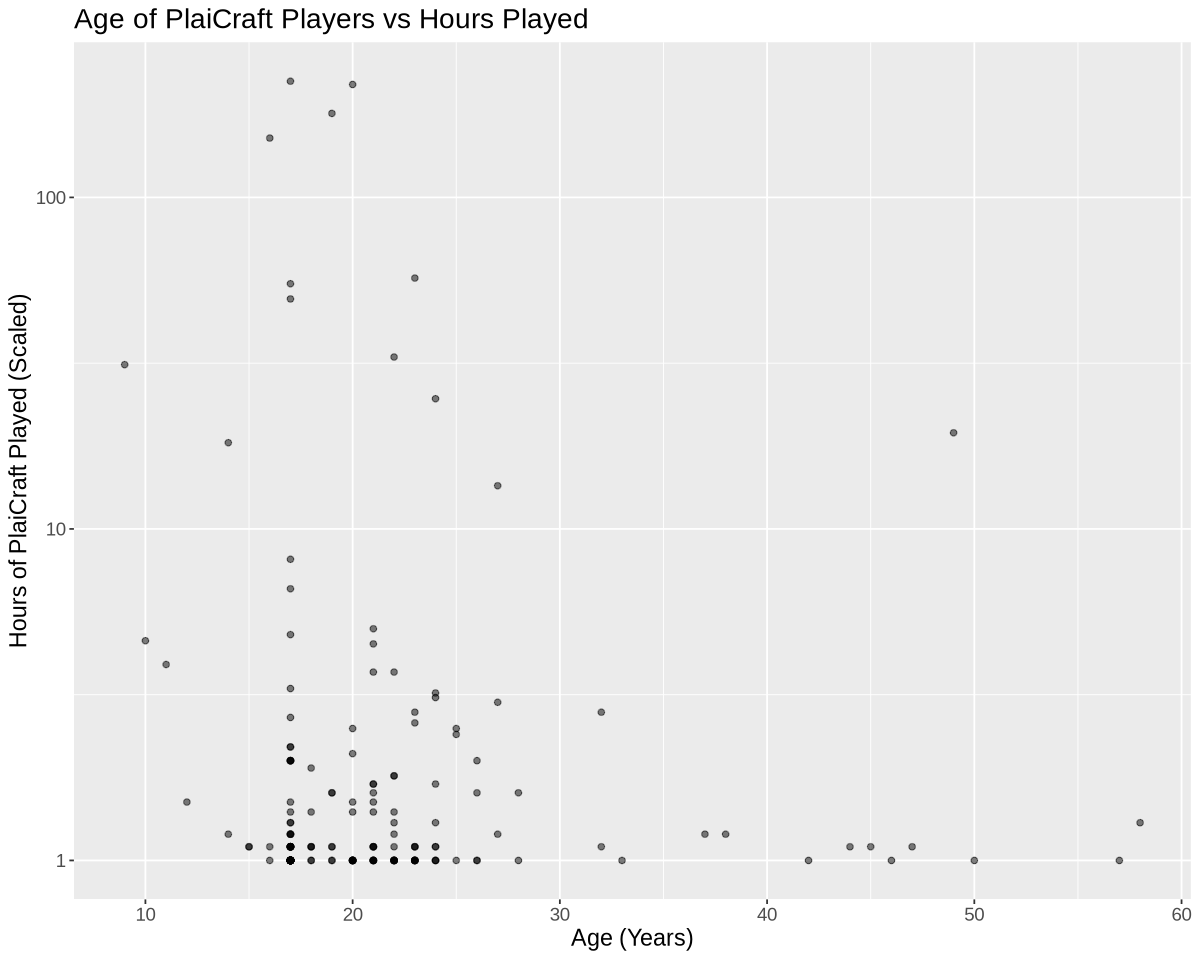

In [85]:
options(repr.plot.width = 10, repr.plot.height = 8)
played_hours_age_plot <- ggplot(players_data, aes(x = Age, y = played_hours + 1)) + #add +1 so that when we log our y-axis, the 0 values won't be infinity
                            geom_point(alpha = 0.5) +
                            labs(x = "Age (Years)", y = "Hours of PlaiCraft Played (Scaled)") +
                            ggtitle("Age of PlaiCraft Players vs Hours Played") +
                            scale_y_log10() +
                            theme(text = element_text(size = 14))
played_hours_age_plot

- No relationship, widespread points, no clear trend
- Condensed near bottom of graph, outliers near top half
- Insinuates that teens and young adults (18 - 20) tend to play more hours

#### Visualization #2

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


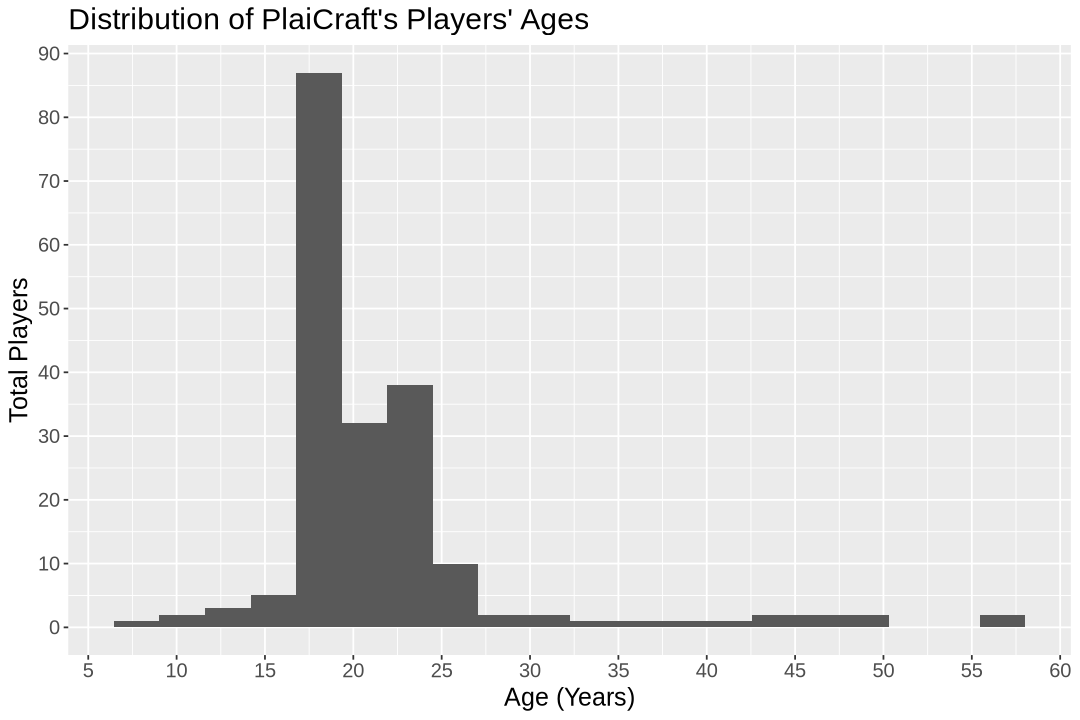

In [88]:
options(repr.plot.width = 9, repr.plot.height = 6)
age_histogram <- ggplot(players_data, aes(x = Age)) +
                    geom_histogram(bins = 20) +
                    labs(x = "Age (Years)", y = "Total Players") +
                    ggtitle("Distribution of PlaiCraft's Players' Ages") +
                    scale_x_continuous(breaks = seq(0, 65, by = 5)) +
                    scale_y_continuous(breaks = seq(0, 90, by = 10)) +
                    theme(text = element_text(size = 15))
age_histogram

- Majority are ~17 years old
- Lots around teenager to young adult ages (16 - 25)
   - Few beyond range (young children and adults)

#### Visualization #3

`summarise()` has grouped output by 'hashedEmail', 'played_hours'. You can
override using the `.groups` argument.


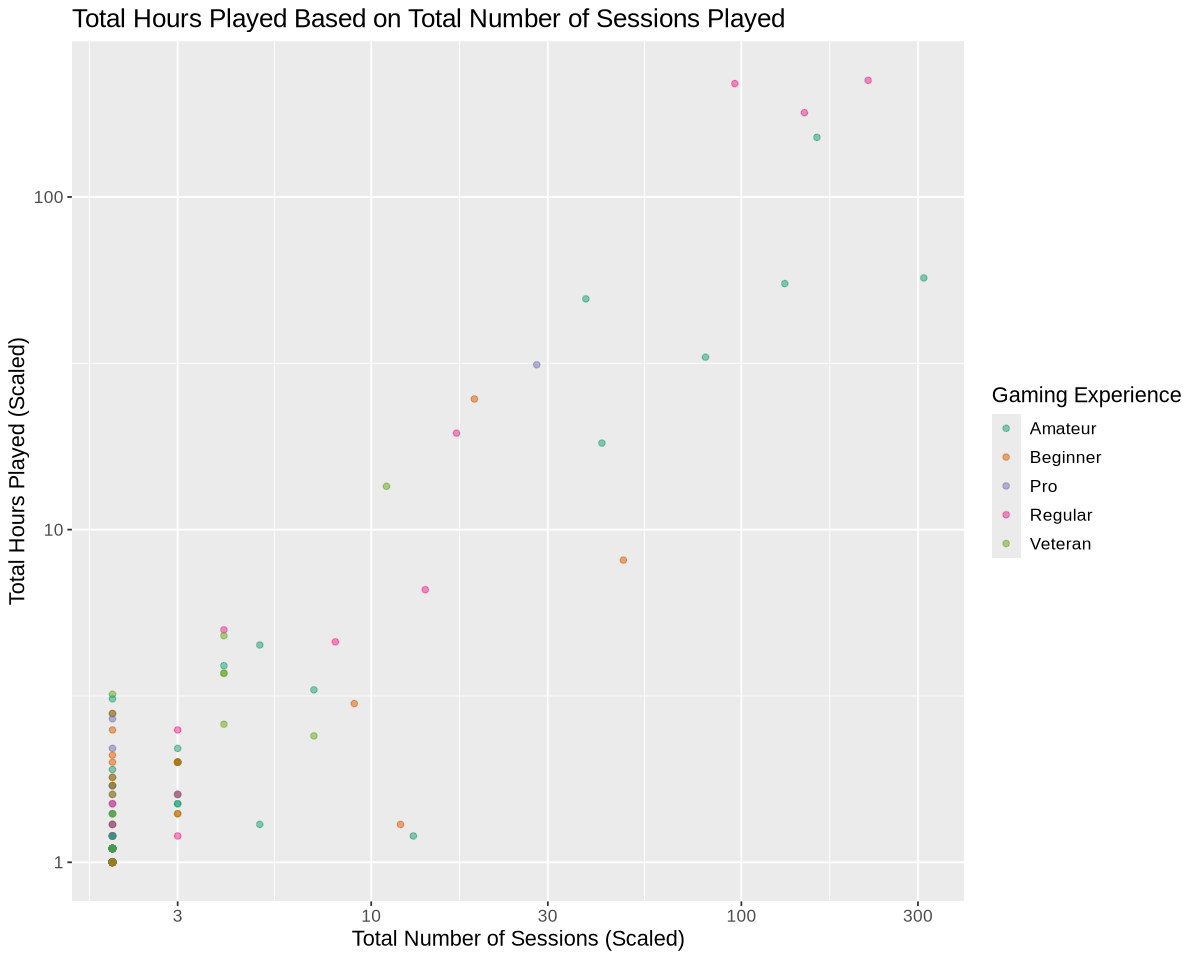

In [87]:
options(repr.plot.width = 10, repr.plot.height = 8)
sessions_hours_total <- sessions_players_join |>
                        select(hashedEmail, played_hours, experience) |>
                        group_by(hashedEmail, played_hours, experience) |>
                        summarize(count = n())

age_sessions_plot <- sessions_hours_total |>
                        ggplot(aes(x = count + 1, y = played_hours + 1, color = experience)) +
                            geom_point(alpha = 0.5) +
                            labs(x = "Total Number of Sessions (Scaled)", y = "Total Hours Played (Scaled)", colour = "Gaming Experience") +
                            ggtitle("Total Hours Played Based on Total Number of Sessions Played") +
                            scale_color_brewer(palette = "Dark2") +
                            scale_y_log10() +
                            scale_x_log10() +
                            theme(text = element_text(size = 13))
age_sessions_plot                        

- Positive relationship
    - Total sessions and hours played increase together
    - Pretty strong; clear upwards trend
- Same number of sessions does not directly indicate same total hours played
- Gaming experience is fairly scattered
    - Some Regular and Amateurs near top right
    - Mixed around origin

#### Visualization #4

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


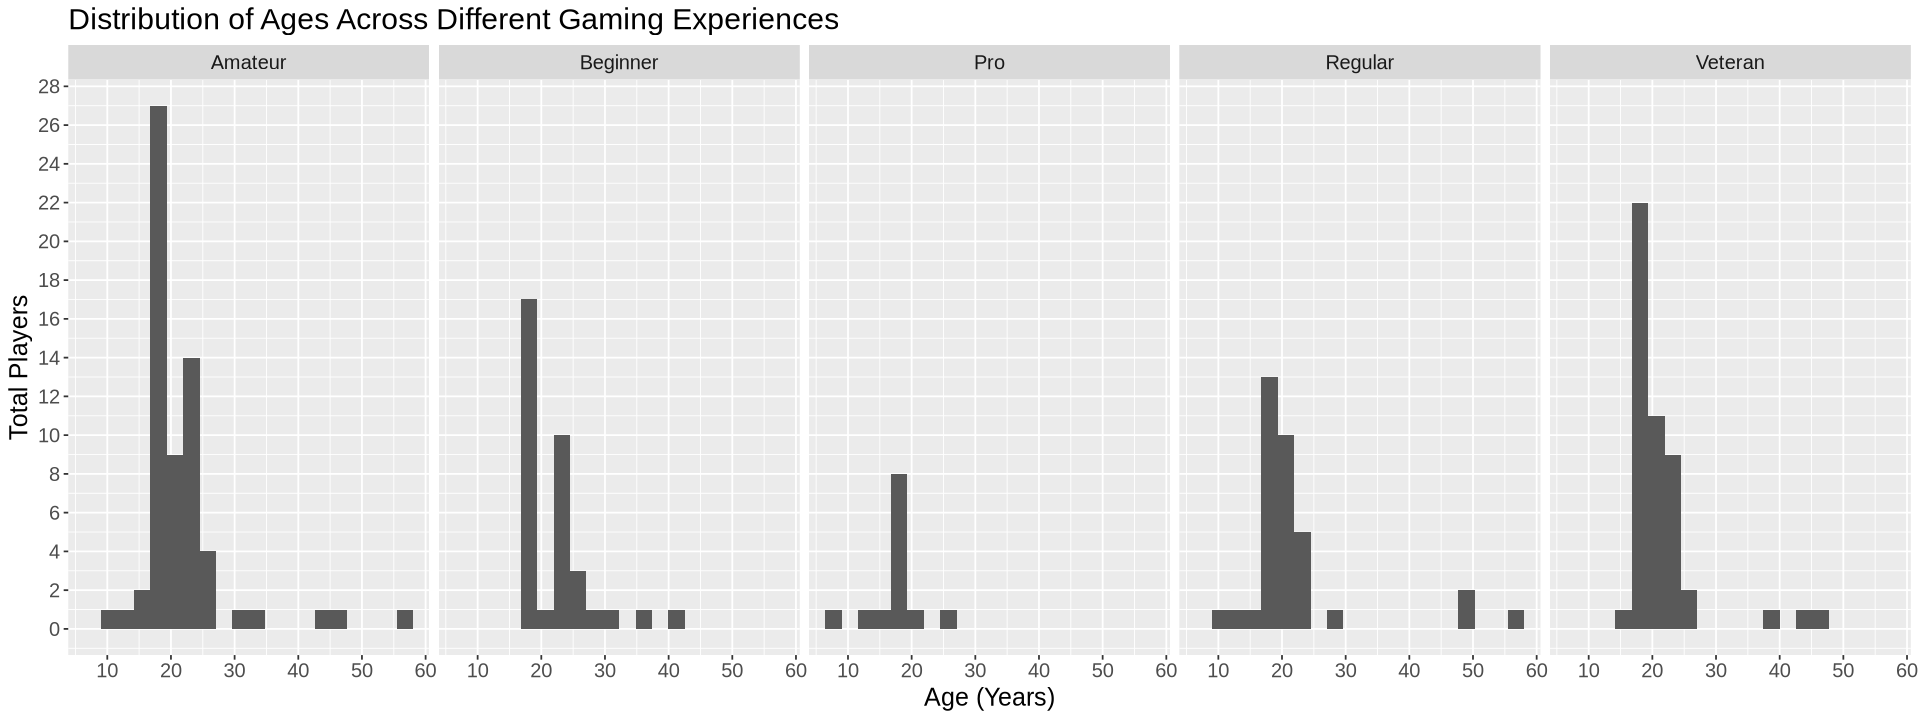

In [42]:
options(repr.plot.width = 16, repr.plot.height = 6)

experience_age_histogram <- age_histogram +
                                ggtitle("Distribution of Ages Across Different Gaming Experiences") +
                                scale_y_continuous(breaks = seq(0, 28, by = 2)) +
                                scale_x_continuous(breaks = seq(0, 60, by = 10)) +
                                facet_grid(cols = vars(experience))

experience_age_histogram

- Age doesn't correlate to gaming experience
    - Any age can still be a pro, etc.
- From previous observations, we may consider "targeting" amateurs and younger players

#### Visualization #5

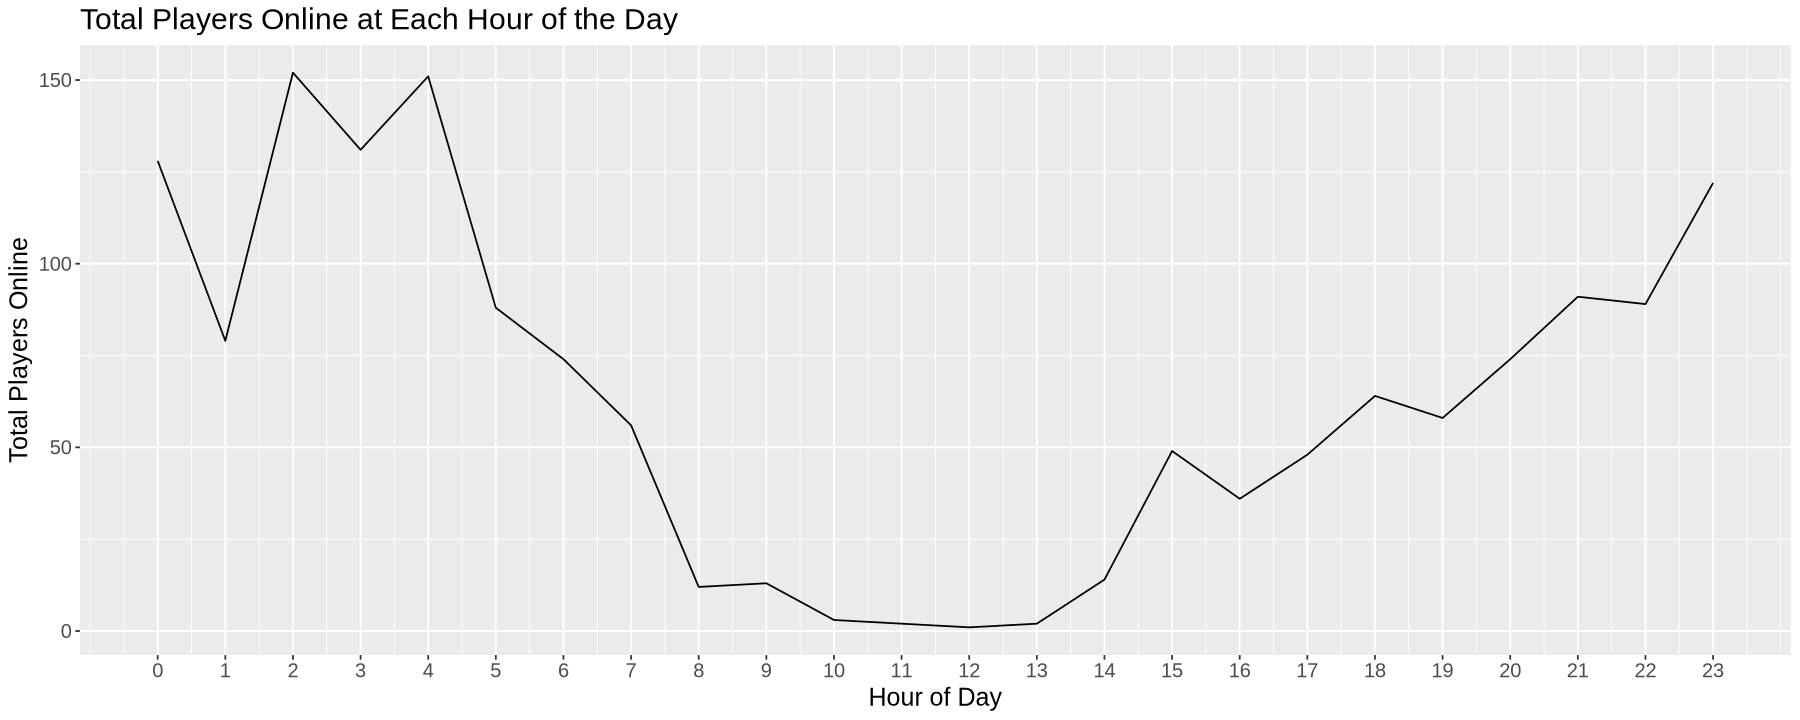

In [28]:
options(repr.plot.width = 15, repr.plot.height = 6)
start_time_players_total <- group_by(sessions_data_tidy, start_time_hr) |>
                                summarize(total_players = n())

start_time_players_line <- ggplot(start_time_players_total, aes(x = start_time_hr, y = total_players)) +
                                geom_line() +
                                scale_x_continuous(breaks = seq(0, 23)) +
                                labs(x = "Hour of Day", y = "Total Players Online") +
                                ggtitle("Total Players Online at Each Hour of the Day") +
                                theme(text = element_text(size = 15))
start_time_players_line

This visualization is a rough estimate of total players online since I converted the values to integers:
- Player activity:
    - Highest: 2 - 5am
    - Lowest: 8am - 2pm
    - High: 3pm onwards
- From previous observations, this makes sense as...
    - Teenagers and young adults have class or work midday
    - Free time later in the day

### 4. Methods and Plans

Choosing an appropriate prediction model is important for accurate and strong performances. I would approach my question using non-linear KNN regression. I would work with the players.csv dataset as it contains played_hours, Age, and I could mutate the experience column, putting each category on a numerical level. The model goal is to input any age and experience and receive a prediction for the total hours they may contribute. Then, we can decide whether to "target" those players.

KNN regression is appropriate because I want to predict a numerical value, played_hours. Contrastly, KNN classification is for categorical predictions. Judging by visualizations above, the variables don't have a linear relationship, so linear regression is not preferred.

I chose explanatory variables, played_hours and Age because they are descriptions of "kinds" of players. They provide the most meaningful and various data to explore and predict from. Typically, they significantly contribute to determining total gametime. Gender was considered but it felt unreliable because there are "prefer not to say" values. These aren't helpful in narrowing down "kinds" of players. Similarily, each players' session times are random; it's not a unique behaviour to each player like age and experience.

##### *To process the data, I will follow the general KNN regression model steps and note specific changes where necessary:*
1. Mutate experience to numerical levels(1 = beginner,... 5 = pro)
2. Inspect and clean data
3. Split dataset
    - 75% training and 25% testing.
4. Tune training set
    - Recipe: response variable = total_hours, explanatory variables = Age + experience_levels
        - Scale with *step_scale* and *step_center*
5. Cross validation on training set
        - 5 folds
    - Make tibble with range of neighbors: 1 to 196
        - Differ by 4; neighbors = 1, 5,... 196
    - Create workflow and use *tune_grid* and *collect_metrics*
6. Filter for optimal *k*
7. Assess on testing data by making new knn model and workflow, then use *predict* and *bind_cols*, and collect metrics
8. Compare RMSPE to cross-validation RMSE
9. Use optimal *k*
    - Fit into original dataset for final model

KNN regression requires few assumptions compared to linear regression. It assumes that new observations are similar to its training data. Thus, some setbacks is inaccurate predictions with observations outside the training data range. Moreover, a larger dataset means longer computation. Luckily, this dataset is not too large, so computing should not be an issue. However, it can become a problem with additional data. It's also sensitive to noisy data and predicts by distance, so scaling is needed to ensure comparable variable scales.

### GitHub Repository

https://github.com/tchan0717/dsci-100-2025w1-group-36.git

### References

Wickham, Hadley, and Garrett Grolemund. 2016. R for Data Science: Import, Tidy, Transform, Visualize, and Model Data. O’Reilly. https://r4ds.had.co.nz/.
\
\
The Pacific Laboratory of Artificial Intelligence. FAQ. Plaicraft. https://plaicraft.ai/faq. 